## **Triển khai hồi quy KNN**
**1: Nhập thư viện**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

**2: Tải dữ liệu**

In [ ]:
data = fetch_california_housing()
X = data.data
y = data.target

print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

**3: Chia dữ liệu thành tập huấn luyện (70%) và tập kiểm tra (30%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**4: Chuẩn hóa**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**5: Tìm K tối ưu bằng Cross-validation**

In [ ]:
k_values = range(1, 21)
cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

**Biểu đồ MSE theo K**

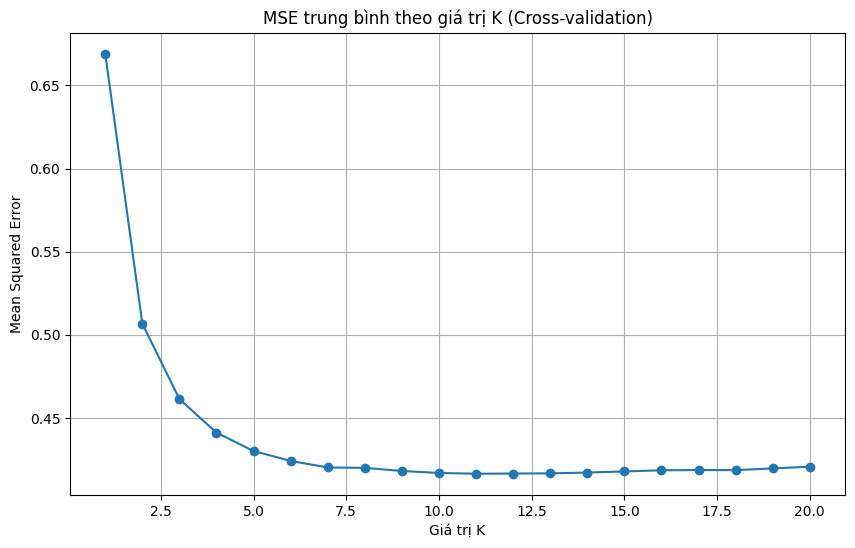

Giá trị K tối ưu: 11


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='#1f77b4')
plt.title('MSE trung bình theo giá trị K (Cross-validation)')
plt.xlabel('Giá trị K')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

optimal_k = k_values[np.argmin(cv_scores)]
print(f'Giá trị K tối ưu: {optimal_k}')


**6: Huấn luyện mô hình**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=optimal_k, weights='distance')
knn.fit(X_train_scaled, y_train)

**7: Dự đoán và đánh giá**

In [ ]:
y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error trên tập kiểm tra: {mse:.4f}')
print(f'R² Score trên tập kiểm tra: {r2:.4f}')

Mean Squared Error trên tập kiểm tra: 0.4058
R² Score trên tập kiểm tra: 0.6908


**Biểu đồ scatter giá thực tế vs giá dự đoán**

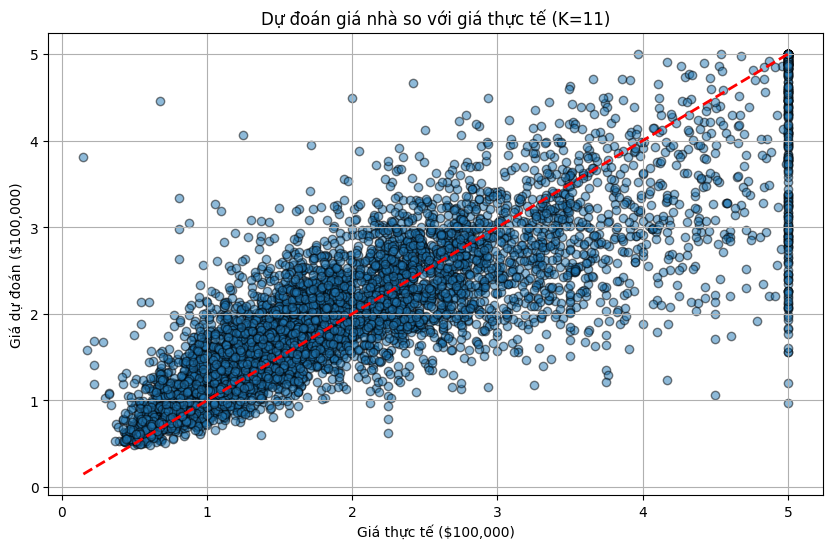

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#1f77b4', alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Dự đoán giá nhà so với giá thực tế (K={optimal_k})')
plt.xlabel('Giá thực tế ($100,000)')
plt.ylabel('Giá dự đoán ($100,000)')
plt.grid(True)
plt.show()

**Biểu đồ dự đoán KNN trên 1 đặc trưng**

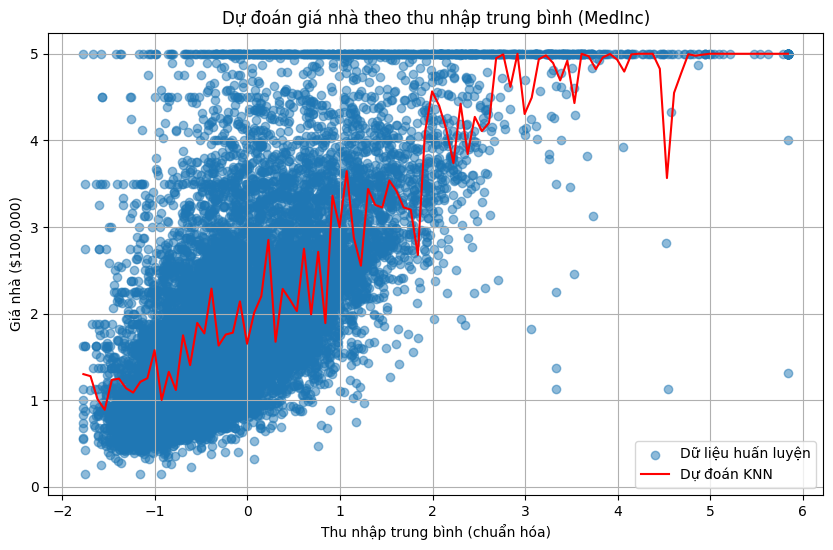

In [ ]:
feature_idx = 0
X_subset = X_train_scaled[:, feature_idx].reshape(-1, 1)
knn_subset = KNeighborsRegressor(n_neighbors=optimal_k, weights='distance')
knn_subset.fit(X_subset, y_train)
X_range = np.linspace(X_subset.min(), X_subset.max(), 100).reshape(-1, 1)
y_range_pred = knn_subset.predict(X_range)
plt.figure(figsize=(10, 6))
plt.scatter(X_subset, y_train, color='#1f77b4', alpha=0.5, label='Dữ liệu huấn luyện')
plt.plot(X_range, y_range_pred, color='red', label='Dự đoán KNN')
plt.title('Dự đoán giá nhà theo thu nhập trung bình (MedInc)')
plt.xlabel('Thu nhập trung bình (chuẩn hóa)')
plt.ylabel('Giá nhà ($100,000)')
plt.legend()
plt.grid(True)
plt.show()